In [1]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


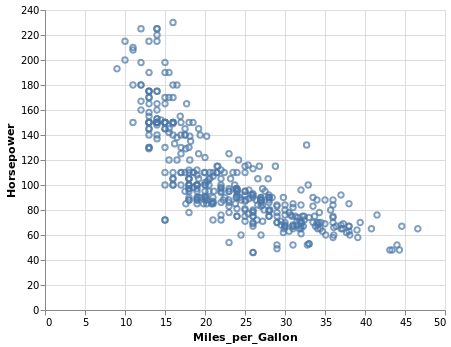

In [3]:
alt.Chart(cars).mark_point().encode(
x = 'Miles_per_Gallon',
y='Horsepower').interactive()

In [4]:
z = alt.Chart(cars).mark_point().encode(
x = 'Miles_per_Gallon',
y='Horsepower').interactive().to_dict()
print(z)

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}}, 'data': {'name': 'data-f02450ab61490a1363517a0190416235'}, 'mark': 'point', 'encoding': {'x': {'type': 'quantitative', 'field': 'Miles_per_Gallon'}, 'y': {'type': 'quantitative', 'field': 'Horsepower'}}, 'selection': {'selector002': {'type': 'interval', 'bind': 'scales', 'encodings': ['x', 'y']}}, '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json', 'datasets': {'data-f02450ab61490a1363517a0190416235': [{'Name': 'chevrolet chevelle malibu', 'Miles_per_Gallon': 18.0, 'Cylinders': 8, 'Displacement': 307.0, 'Horsepower': 130.0, 'Weight_in_lbs': 3504, 'Acceleration': 12.0, 'Year': '1970-01-01T00:00:00', 'Origin': 'USA'}, {'Name': 'buick skylark 320', 'Miles_per_Gallon': 15.0, 'Cylinders': 8, 'Displacement': 350.0, 'Horsepower': 165.0, 'Weight_in_lbs': 3693, 'Acceleration': 11.5, 'Year': '1970-01-01T00:00:00', 'Origin': 'USA'}, {'Name': 'plymouth satellite', 'Miles_per_Gallon': 18.0, 'Cylinders': 8, 

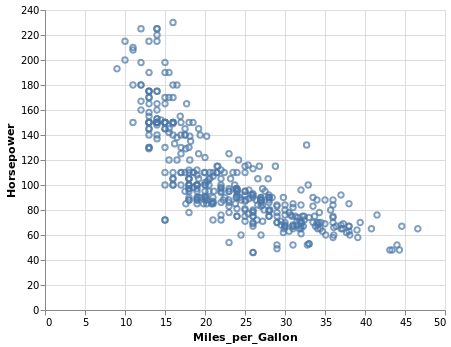

In [5]:
alt.Chart().from_dict(z)


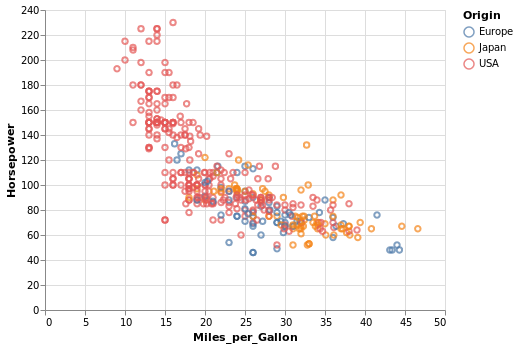

In [6]:
alt.Chart(cars).mark_point().encode(
x = 'Miles_per_Gallon',
y='Horsepower',
color='Origin:N').interactive()

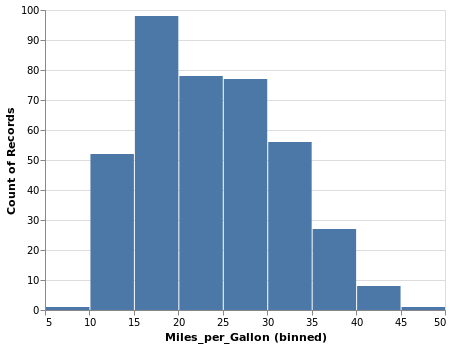

In [7]:
alt.Chart(cars).mark_bar().encode(
x=alt.X('Miles_per_Gallon',bin=True),
y='count()')

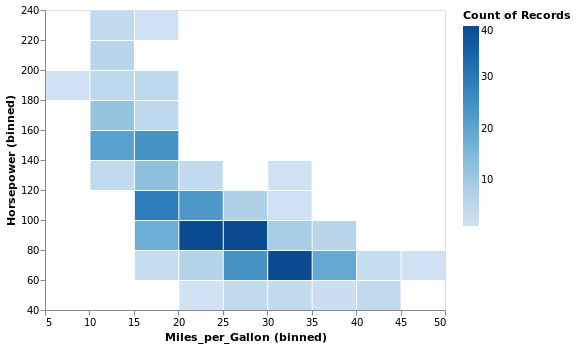

In [8]:
alt.Chart(cars).mark_bar().encode(
x=alt.X('Miles_per_Gallon',bin=True),
y=alt.Y('Horsepower',bin=True),
color='count()')

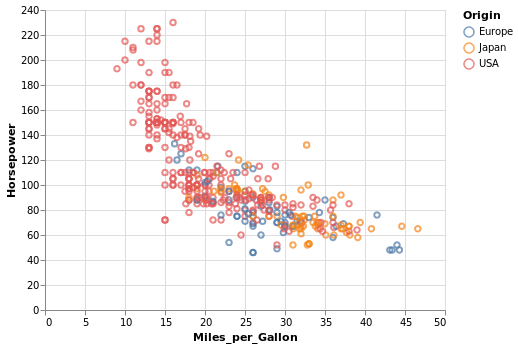

In [9]:
interval = alt.selection_interval(encodings=['x','y'])
alt.Chart(cars).mark_point().encode(
x='Miles_per_Gallon',
y='Horsepower',
color='Origin:N').properties(
selection = interval)

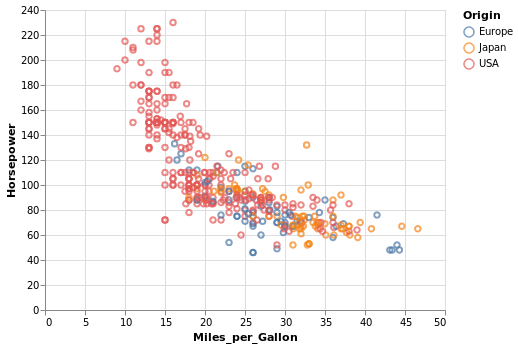

In [10]:
interval = alt.selection_interval(encodings=['x','y'])
alt.Chart(cars).mark_point().encode(
x='Miles_per_Gallon',
y='Horsepower',
    color = alt.condition(interval,'Origin',alt.value('lightgray'))).properties(
selection = interval)

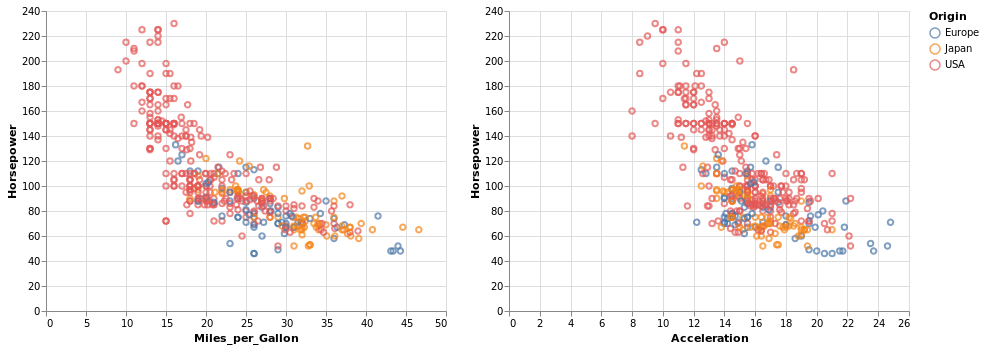

In [11]:
interval = alt.selection_interval(encodings=['x'])
chart = alt.Chart(cars).mark_point().encode(
x='Miles_per_Gallon',
y='Horsepower',
    color = alt.condition(interval,'Origin',alt.value('lightgray')),
tooltip = 'Name').properties(
selection = interval)


chart | chart.encode(x='Acceleration')


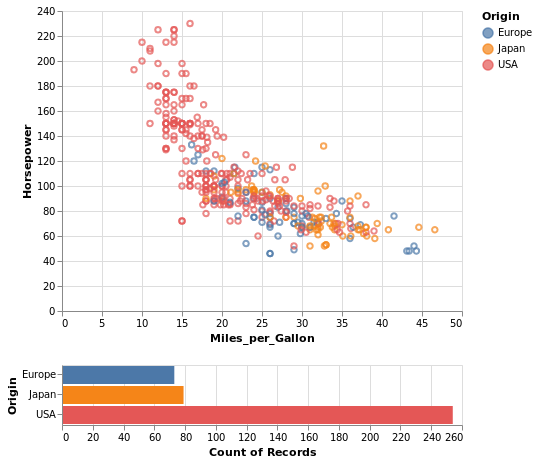

In [12]:
chart = alt.Chart(cars).mark_point().encode(
x='Miles_per_Gallon',
y='Horsepower',
    color = alt.condition(interval,'Origin',alt.value('lightgray')),
tooltip = 'Name').properties(
selection = interval)

hist = alt.Chart(cars).mark_bar().encode(
x='count()',
y='Origin',
color='Origin:N').transform_filter(
interval)

alt.vconcat(chart,hist)


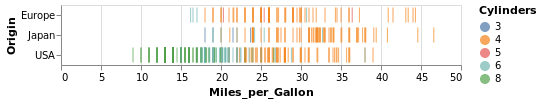

In [13]:
alt.Chart(cars).mark_tick().encode(
x='Miles_per_Gallon:Q',
y='Origin:N',
color='Cylinders:N')

In [14]:
cars.groupby('Origin')['Miles_per_Gallon'].mean()

Origin
Europe    27.891429
Japan     30.450633
USA       20.083534
Name: Miles_per_Gallon, dtype: float64

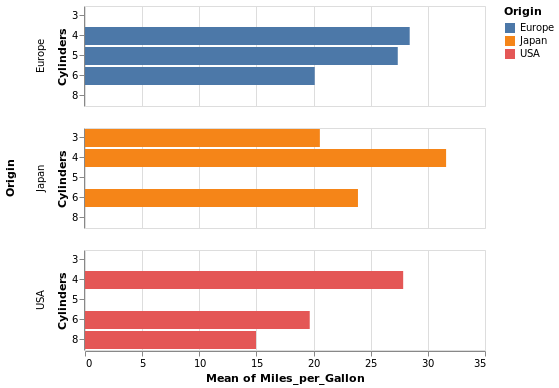

In [15]:
alt.Chart(cars).mark_bar().encode(
y='Cylinders:O',
row='Origin',
x='mean(Miles_per_Gallon)',
color='Origin')

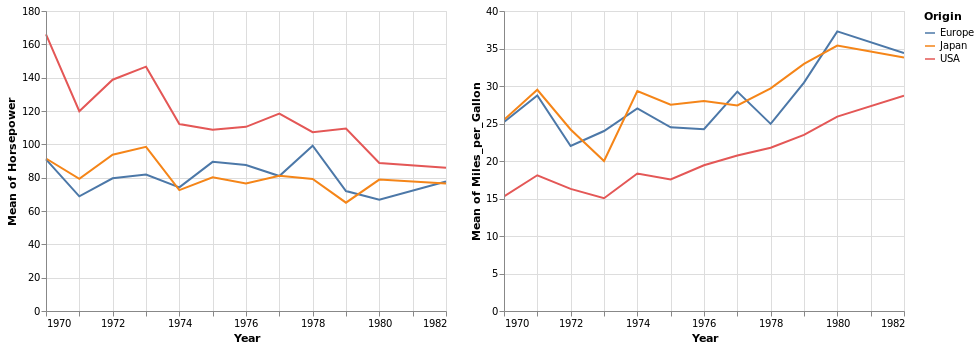

In [16]:
# alt.Chart(cars).mark_point().encode(
# x='Year',
# y='Horsepower',
# color='Origin')


# alt.Chart(cars).mark_point().encode(
# x='Year:T',
# y='mean(Horsepower)',
# color='Origin')

horse = alt.Chart(cars).mark_line().encode(
x='Year',
y='mean(Horsepower)',
color='Origin')


milespergallon = alt.Chart(cars).mark_line().encode(
x='Year',
y='mean(Miles_per_Gallon)',
color='Origin').interactive()

horse | milespergallon

In [17]:
temps=data.seattle_temps()
temps
alt.Chart(temps).mark_bar()

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

In [18]:
len(temps)

8759

In [137]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [141]:
alt.Chart(temps).mark_point().to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'data': {'url': 'altair-data-724d6426c5eb0a15708f1ea6286b0a8d.json',
  'format': {'type': 'json'}},
 'mark': 'point',
 '$schema': 'https://vega.github.io/schema/vega-lite/v3.4.0.json'}

In [142]:
temps.head()

,date,temp
0,2010-01-01 00:00:00,39.4
1,2010-01-01 01:00:00,39.2
2,2010-01-01 02:00:00,39.0
3,2010-01-01 03:00:00,38.9
4,2010-01-01 04:00:00,38.8


In [ ]:
alt.Chart(temps).mark_point()